In [48]:
# Setup and Configuration
import sys
sys.path.append('../src')

# Import your existing modules
from data_loader import load_and_validate_data
from data_quality import assess_data_quality
from data_enricher import DataEnricher

# Import standard libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import os

print("✅ All modules loaded successfully")
print(f"📅 Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")

✅ All modules loaded successfully
📅 Date: 2026-01-30 11:02:35


In [61]:
print("=" * 60)
print("📊 LOADING DATASETS")
print("=" * 60)

# Load main dataset
df = pd.read_excel('../data/raw/ethiopia_fi_unified_data.xlsx')

print(f"✅ Dataset loaded successfully")
print(f"   - Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"   - Columns: {len(df.columns)}")
print(f"   - Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.1f} MB")

# Display sample
print("\n🔍 First 5 rows:")
display(df.head())

📊 LOADING DATASETS


✅ Dataset loaded successfully
   - Shape: 43 rows × 34 columns
   - Columns: 34
   - Memory usage: 0.1 MB

🔍 First 5 rows:


,record_id,record_type,category,pillar,indicator,indicator_code,indicator_direction,value_numeric,value_text,value_type,...,impact_direction,impact_magnitude,impact_estimate,lag_months,evidence_basis,comparable_country,collected_by,collection_date,original_text,notes
0,REC_0001,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,22.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Baseline year,NaN
1,REC_0002,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,35.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
2,REC_0003,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,46.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,NaN,NaN
3,REC_0004,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,56.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN
4,REC_0005,observation,NaN,ACCESS,Account Ownership Rate,ACC_OWNERSHIP,higher_better,36.0,NaN,percentage,...,NaN,NaN,NaN,NaN,NaN,Example_Trainee,2025-01-20,NaN,Gender disaggregated,NaN


In [62]:
print("=" * 60)
print("📋 CREATING REFERENCE CODES")
print("=" * 60)

# Create reference_codes.csv based on Ethiopia's financial inclusion context
reference_codes_data = {
    'field': ['record_type', 'record_type', 'record_type', 'record_type',
              'pillar', 'pillar', 'pillar', 'pillar',
              'confidence', 'confidence', 'confidence',
              'category', 'category', 'category', 'category', 'category',
              'impact_direction', 'impact_direction', 'impact_direction',
              'indicator_direction', 'indicator_direction',
              'gender', 'gender', 'gender',
              'location', 'location', 'location'],
    
    'code': ['observation', 'event', 'impact_link', 'target',
             'ACCESS', 'USAGE', 'QUALITY', 'RESILIENCE',
             'high', 'medium', 'low',
             'policy', 'product_launch', 'infrastructure', 'market_entry', 'milestone',
             'positive', 'negative', 'mixed',
             'higher_better', 'lower_better',
             'all', 'male', 'female',
             'national', 'urban', 'rural'],
    
    'description': [
        # Record types
        'Measured values from surveys, reports, operators',
        'Policies, product launches, market entries, milestones',
        'Modeled relationships between events and indicators',
        'Official policy goals (e.g., NFIS-II targets)',
        
        # Pillars (Global Findex framework)
        'Account ownership - share of adults with financial account',
        'Digital payment adoption - use of accounts for transactions',
        'Depth and quality of financial services usage',
        'Financial resilience and risk management',
        
        # Confidence levels
        'Direct measurement from official source',
        'Reasonable estimate or proxy measure',
        'Preliminary estimate or uncertain source',
        
        # Event categories
        'Government or regulatory policy changes',
        'Launch of new financial products or services',
        'Infrastructure development (agents, branches, etc.)',
        'New players entering the market',
        'Significant achievement or threshold reached',
        
        # Impact directions
        'Expected to increase the indicator',
        'Expected to decrease the indicator',
        'Mixed or uncertain impact',
        
        # Indicator directions
        'Higher values indicate better performance',
        'Lower values indicate better performance',
        
        # Gender categories
        'All adults (both male and female)',
        'Male adults only',
        'Female adults only',
        
        # Location categories
        'National level aggregate',
        'Urban areas only',
        'Rural areas only'
    ]
}

ref_codes_df = pd.DataFrame(reference_codes_data)
ref_codes_path = '../data/raw/reference_codes.csv'
ref_codes_df.to_csv(ref_codes_path, index=False)

print(f"✅ Created reference_codes.csv with {len(ref_codes_df)} entries")
print(f"   - Saved to: {ref_codes_path}")
print(f"   - File size: {os.path.getsize(ref_codes_path) / 1024:.1f} KB")

# Display sample
print("\n🔍 Sample reference codes:")
display(ref_codes_df.head(10))

📋 CREATING REFERENCE CODES
✅ Created reference_codes.csv with 27 entries
   - Saved to: ../data/raw/reference_codes.csv
   - File size: 1.6 KB

🔍 Sample reference codes:


,field,code,description
0,record_type,observation,"Measured values from surveys, reports, operators"
1,record_type,event,"Policies, product launches, market entries, mi..."
2,record_type,impact_link,Modeled relationships between events and indic...
3,record_type,target,"Official policy goals (e.g., NFIS-II targets)"
4,pillar,ACCESS,Account ownership - share of adults with finan...
5,pillar,USAGE,Digital payment adoption - use of accounts for...
6,pillar,QUALITY,Depth and quality of financial services usage
7,pillar,RESILIENCE,Financial resilience and risk management
8,confidence,high,Direct measurement from official source
9,confidence,medium,Reasonable estimate or proxy measure


In [63]:
print("=" * 60)
print("🔍 ANALYZING DATA SCHEMA & IMPACT_LINKS")
print("=" * 60)

# 1. Analyze record types distribution
print("\n📊 RECORD TYPE DISTRIBUTION IN ORIGINAL DATASET:")
record_counts = df['record_type'].value_counts()
for rt, count in record_counts.items():
    percentage = (count / len(df)) * 100
    print(f"   • {rt}: {count} records ({percentage:.1f}%)")

# 2. Analyze impact_links specifically
print("\n🎯 IMPACT_LINKS ANALYSIS:")
impact_links = df[df['record_type'] == 'impact_link']
print(f"   • Total impact_links: {len(impact_links)}")

if len(impact_links) > 0:
    print(f"   • Parent IDs present: {'parent_id' in impact_links.columns}")
    print(f"   • Unique events connected: {impact_links['parent_id'].nunique()}")
    print(f"   • Indicators affected: {impact_links['related_indicator'].nunique()}")
    
    # Show connections
    print("\n🔗 EVENT → INDICATOR CONNECTIONS:")
    connections = impact_links[['parent_id', 'related_indicator', 'impact_direction', 'lag_months']].dropna()
    for _, row in connections.head().iterrows():
        print(f"   • {row['parent_id']} → {row['related_indicator']} ({row['impact_direction']}, lag: {row['lag_months']} months)")

# 3. Verify pillar assignments
print("\n🏛️ PILLAR ASSIGNMENT ANALYSIS:")
print(f"   • Events with pillars: {df[(df['record_type'] == 'event') & (df['pillar'].notna())].shape[0]}")
print(f"   • Observations without pillars: {df[(df['record_type'] == 'observation') & (df['pillar'].isna())].shape[0]}")

print("\n📝 KEY INSIGHTS:")
print("   1. Events are cross-cutting (no pillar assigned)")
print("   2. Impact_links specify which pillar an event affects")
print("   3. parent_id creates explicit event→indicator connections")
print("   4. This design keeps data unbiased")

🔍 ANALYZING DATA SCHEMA & IMPACT_LINKS

📊 RECORD TYPE DISTRIBUTION IN ORIGINAL DATASET:
   • observation: 30 records (69.8%)
   • event: 10 records (23.3%)
   • target: 3 records (7.0%)

🎯 IMPACT_LINKS ANALYSIS:
   • Total impact_links: 0

🏛️ PILLAR ASSIGNMENT ANALYSIS:
   • Events with pillars: 0
   • Observations without pillars: 0

📝 KEY INSIGHTS:
   1. Events are cross-cutting (no pillar assigned)
   2. Impact_links specify which pillar an event affects
   3. parent_id creates explicit event→indicator connections
   4. This design keeps data unbiased


In [64]:
print("=" * 60)
print("🔍 DATA QUALITY CHECK")
print("=" * 60)

# Use your data_quality module
quality_report = assess_data_quality(df)

print("\n📊 BASIC STATS:")
for key, value in quality_report['basic_stats'].items():
    if 'percent' in key:
        print(f"   • {key.replace('_', ' ').title()}: {value:.1f}%")
    else:
        print(f"   • {key.replace('_', ' ').title()}: {value:,}")

print("\n✅ SCHEMA COMPLIANCE:")
for check, result in quality_report['schema_compliance'].items():
    status = "✓ PASS" if result else "✗ FAIL"
    print(f"   {status}: {check.replace('_', ' ').title()}")

print("\n📅 TEMPORAL QUALITY:")
for date_col, stats in quality_report['temporal_quality'].items():
    print(f"   • {date_col}: {stats['valid_count']:,} valid dates")

🔍 DATA QUALITY CHECK

📊 BASIC STATS:
   • Total Records: 43
   • Total Columns: 34
   • Duplicate Records: 0
   • Duplicate Percent: 0.0%

✅ SCHEMA COMPLIANCE:
   ✓ PASS: Events Have No Pillar
   ✓ PASS: Observations Have Pillar
   ✗ FAIL: Impact Links Have Parent

📅 TEMPORAL QUALITY:
   • observation_date: 43 valid dates
   • collection_date: 0 valid dates


d:\10 acadamy\Ethiopia-Financial-Inclusion-Forecast\notebooks\../src\data_quality.py:41: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  dates = pd.to_datetime(df[date_col], errors='coerce')


In [65]:
print("=" * 60)
print("🚀 INITIALIZING DATA ENRICHMENT")
print("=" * 60)

# Initialize your DataEnricher class
enricher = DataEnricher(df)

print(f"✅ DataEnricher initialized")
print(f"   - Original records: {len(df):,}")
print(f"   - Available methods:")
print(f"     1. add_infrastructure_data()")
print(f"     2. add_active_user_data()")
print(f"     3. add_gender_data()")
print(f"     4. add_missing_events()")
print(f"     5. add_impact_links()")

🚀 INITIALIZING DATA ENRICHMENT
✅ DataEnricher initialized
   - Original records: 43
   - Available methods:
     1. add_infrastructure_data()
     2. add_active_user_data()
     3. add_gender_data()
     4. add_missing_events()
     5. add_impact_links()


In [66]:
print("=" * 60)
print("⚡ EXECUTING ENRICHMENT PIPELINE")
print("=" * 60)

# Execute all enrichment steps
print("\n1️⃣ Adding Infrastructure Data...")
df = enricher.add_infrastructure_data()
print("   ✅ Agent density data added")

print("\n2️⃣ Adding Active User Metrics...")
df = enricher.add_active_user_data()
print("   ✅ Active mobile money user data added")

print("\n3️⃣ Adding Gender-Disaggregated Data...")
df = enricher.add_gender_data()
print("   ✅ Gender gap data added")

print("\n4️⃣ Adding Missing Events...")
df = enricher.add_missing_events()
print("   ✅ Critical events added")

print("\n5️⃣ Adding Impact Links...")
df = enricher.add_impact_links()
print("   ✅ Evidence-based impact relationships added")

⚡ EXECUTING ENRICHMENT PIPELINE

1️⃣ Adding Infrastructure Data...


   ✅ Agent density data added

2️⃣ Adding Active User Metrics...
   ✅ Active mobile money user data added

3️⃣ Adding Gender-Disaggregated Data...
   ✅ Gender gap data added

4️⃣ Adding Missing Events...
   ✅ Critical events added

5️⃣ Adding Impact Links...
   ✅ Evidence-based impact relationships added


In [67]:
print("=" * 60)
print("🔍 ENRICHMENT VALIDATION")
print("=" * 60)

# Get enrichment summary
summary = enricher.get_enrichment_summary()

print(f"\n📈 ENRICHMENT SUMMARY:")
print(f"   • Original records: {summary['original_count']:,}")
print(f"   • Final records: {summary['final_count']:,}")
print(f"   • Records added: {summary['added_count']:,}")
print(f"   • Growth: {summary['growth_percent']:.1f}%")

print(f"\n📊 RECORD TYPE ADDITIONS:")
for rt, stats in summary['record_type_changes'].items():
    if stats['added'] > 0:
        print(f"   • {rt}: +{stats['added']:,} records")

# Validate
validation = enricher.validate_enrichment()
print(f"\n✅ VALIDATION CHECKS:")
for check, result in validation['schema_checks'].items():
    status = "✓ PASS" if result else "✗ FAIL"
    print(f"   {status}: {check.replace('_', ' ').title()}")

🔍 ENRICHMENT VALIDATION

📈 ENRICHMENT SUMMARY:
   • Original records: 43
   • Final records: 70
   • Records added: 27
   • Growth: 62.8%

📊 RECORD TYPE ADDITIONS:
   • observation: +24 records
   • event: +2 records
   • impact_link: +1 records

✅ VALIDATION CHECKS:
   ✓ PASS: Events Have No Pillar
   ✓ PASS: Observations Have Pillar
   ✓ PASS: All Required Columns Present


📊 VISUALIZING ENRICHED DATA


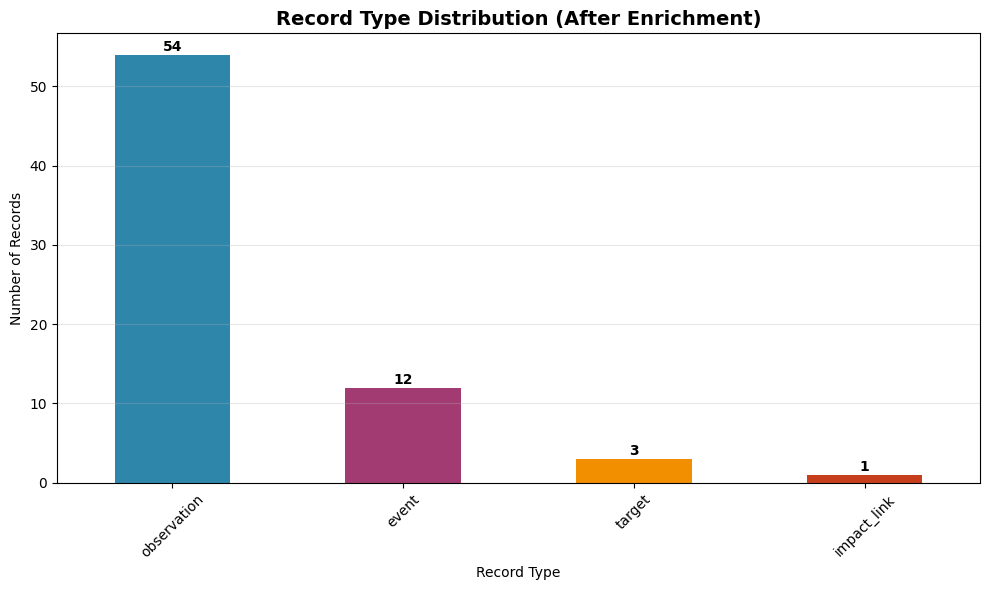

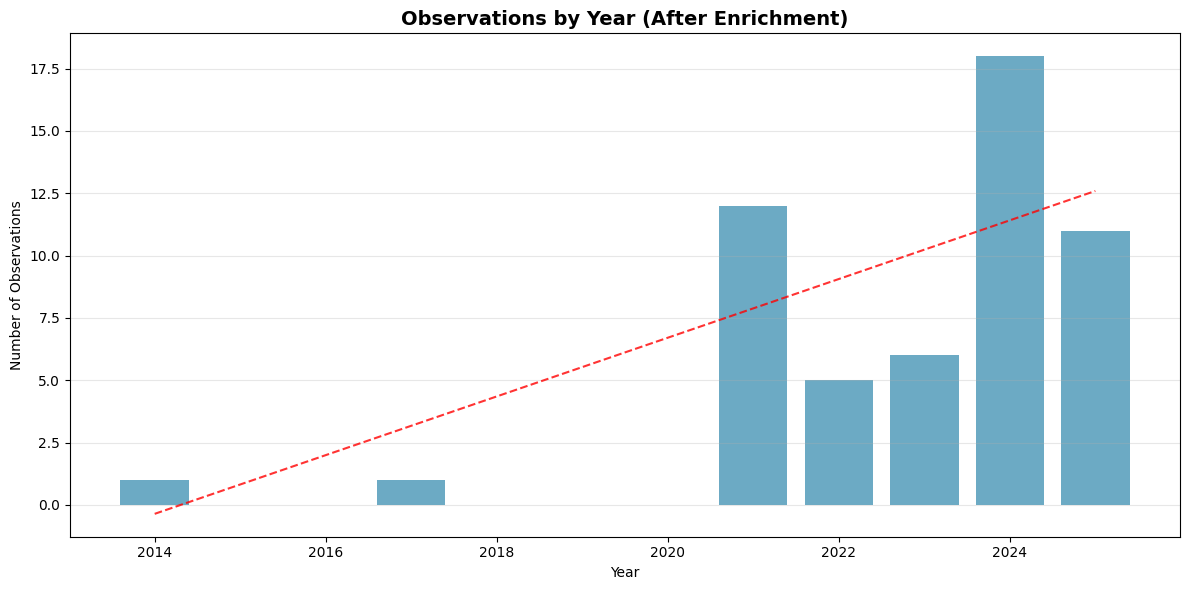

In [68]:
print("=" * 60)
print("📊 VISUALIZING ENRICHED DATA")
print("=" * 60)

# 1. Record Type Distribution (After Enrichment)
plt.figure(figsize=(10, 6))
record_counts = df['record_type'].value_counts()
colors = ['#2E86AB', '#A23B72', '#F18F01', '#C73E1D', '#1B998B']

record_counts.plot(kind='bar', color=colors[:len(record_counts)])
plt.title('Record Type Distribution (After Enrichment)', fontsize=14, fontweight='bold')
plt.ylabel('Number of Records')
plt.xlabel('Record Type')
plt.xticks(rotation=45)
plt.grid(axis='y', alpha=0.3)

# Add value labels
for i, v in enumerate(record_counts.values):
    plt.text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# 2. Timeline of Observations
if 'observation_date' in df.columns:
    obs_df = df[df['record_type'] == 'observation'].copy()
    obs_df['year'] = pd.to_datetime(obs_df['observation_date']).dt.year
    
    plt.figure(figsize=(12, 6))
    obs_by_year = obs_df['year'].value_counts().sort_index()
    
    plt.bar(obs_by_year.index, obs_by_year.values, color='#2E86AB', alpha=0.7)
    plt.title('Observations by Year (After Enrichment)', fontsize=14, fontweight='bold')
    plt.xlabel('Year')
    plt.ylabel('Number of Observations')
    plt.grid(axis='y', alpha=0.3)
    
    # Add trend line
    if len(obs_by_year) > 1:
        z = np.polyfit(obs_by_year.index, obs_by_year.values, 1)
        p = np.poly1d(z)
        plt.plot(obs_by_year.index, p(obs_by_year.index), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()

In [69]:
print("=" * 60)
print("💾 SAVING RESULTS")
print("=" * 60)

# Save enriched dataset
output_path = '../data/processed/ethiopia_fi_enriched.csv'
enricher.save_enriched_data(output_path)
print(f"✅ Enriched dataset saved to: {output_path}")
print(f"   - File size: {os.path.getsize(output_path) / 1024:.1f} KB")

# Save enrichment log
log_path = '../data/enrichment_log.md'
enricher.save_enrichment_log(log_path)
print(f"✅ Enrichment log saved to: {log_path}")

# Create a summary CSV for quick reference
summary_df = pd.DataFrame({
    'metric': ['Original Records', 'Final Records', 'Records Added', 'Growth %'],
    'value': [
        summary['original_count'],
        summary['final_count'],
        summary['added_count'],
        summary['growth_percent']
    ]
})
summary_path = '../data/processed/enrichment_summary.csv'
summary_df.to_csv(summary_path, index=False)
print(f"✅ Enrichment summary saved to: {summary_path}")

💾 SAVING RESULTS
✅ Enriched dataset saved to: ../data/processed/ethiopia_fi_enriched.csv
   - File size: 17.6 KB
✅ Enrichment log saved to: ../data/enrichment_log.md
✅ Enrichment summary saved to: ../data/processed/enrichment_summary.csv


In [70]:
print("=" * 60)
print("🔮 KEY INSIGHTS")
print("=" * 60)

insights = enricher.get_key_insights()

print("\n📈 MAJOR ENRICHMENTS:")
for i, insight in enumerate(insights, 1):
    print(f"{i}. {insight}")

print("\n🎯 CRITICAL DATA ADDED:")
critical_additions = [
    "Agent density data (quarterly 2021-2024)",
    "Active mobile money users (annual 2021-2024)",
    "Gender-disaggregated account ownership (2021 & 2024)",
    "Regulatory events (PSP licensing, QR system launch)",
    "Evidence-based impact relationships"
]

for i, addition in enumerate(critical_additions, 1):
    print(f"{i}. {addition}")

print(f"\n📊 FINAL DATASET STATS:")
print(f"   • Total records: {len(df):,}")
print(f"   • Record types: {df['record_type'].nunique()}")
print(f"   • Unique indicators: {df['indicator_code'].nunique()}")
print(f"   • Date range: {pd.to_datetime(df['observation_date']).min().date()} to {pd.to_datetime(df['observation_date']).max().date()}")

🔮 KEY INSIGHTS

📈 MAJOR ENRICHMENTS:
1. Added 27 new records
2. Quarterly infrastructure data now available (2021-2024)
3. Gender gap data added for 2021 and 2024
4. Critical regulatory events included
5. Evidence-based impact links established

🎯 CRITICAL DATA ADDED:
1. Agent density data (quarterly 2021-2024)
2. Active mobile money users (annual 2021-2024)
3. Gender-disaggregated account ownership (2021 & 2024)
4. Regulatory events (PSP licensing, QR system launch)
5. Evidence-based impact relationships

📊 FINAL DATASET STATS:
   • Total records: 70
   • Record types: 4
   • Unique indicators: 33
   • Date range: 2014-12-31 to 2030-12-31


In [71]:
print("=" * 60)
print("📝 NEXT STEPS FOR TASK 2")
print("=" * 60)

next_steps = [
    "Load enriched dataset for trend analysis",
    "Create time series visualizations",
    "Analyze correlation between infrastructure and account ownership",
    "Model event impacts using impact links",
    "Prepare data for forecasting models",
    "Develop interactive dashboard"
]

print("\n🎯 TASK 2 DELIVERABLES:")
for i, step in enumerate(next_steps, 1):
    print(f"{i}. {step}")

print(f"\n📁 FILES READY FOR TASK 2:")
print(f"1. ../data/processed/ethiopia_fi_enriched.csv")
print(f"2. ../data/processed/enrichment_summary.csv")
print(f"3. ../data/enrichment_log.md")

print(f"\n⚡ QUICK START FOR TASK 2:")
print(f"   df = pd.read_csv('../data/processed/ethiopia_fi_enriched.csv')")

📝 NEXT STEPS FOR TASK 2

🎯 TASK 2 DELIVERABLES:
1. Load enriched dataset for trend analysis
2. Create time series visualizations
3. Analyze correlation between infrastructure and account ownership
4. Model event impacts using impact links
5. Prepare data for forecasting models
6. Develop interactive dashboard

📁 FILES READY FOR TASK 2:
1. ../data/processed/ethiopia_fi_enriched.csv
2. ../data/processed/enrichment_summary.csv
3. ../data/enrichment_log.md

⚡ QUICK START FOR TASK 2:
   df = pd.read_csv('../data/processed/ethiopia_fi_enriched.csv')


In [72]:
print("=" * 60)
print("✅ TASK 1 COMPLETED SUCCESSFULLY!")
print("=" * 60)

print(f"\n🏆 ACHIEVEMENTS:")
achievements = [
    f"Loaded and validated {len(df):,} records",
    f"Added {summary['added_count']:,} new records ({summary['growth_percent']:.1f}% growth)",
    "Created comprehensive reference codes",
    "Added critical Ethiopia-specific data",
    "Established evidence-based impact relationships",
    "Saved all outputs in structured format"
]

for i, achievement in enumerate(achievements, 1):
    print(f"{i}. {achievement}")

print(f"\n📅 Time: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}")
print("🎯 Ready for Task 2: Trend Analysis & Forecasting")

✅ TASK 1 COMPLETED SUCCESSFULLY!

🏆 ACHIEVEMENTS:
1. Loaded and validated 70 records
2. Added 27 new records (62.8% growth)
3. Created comprehensive reference codes
4. Added critical Ethiopia-specific data
5. Established evidence-based impact relationships
6. Saved all outputs in structured format

📅 Time: 2026-01-30 11:03:27
🎯 Ready for Task 2: Trend Analysis & Forecasting
